<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/milmor/NLP/blob/main/Notebooks/07_MLP.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
</table>

# Perceptrón multicapa
- Este código implementa un perceptrón multicapa para resolver el problema de clasificación de la compuerta lógica XOR.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_perceptron_decision_boundary(X, y, w1, b1, w2, b2):
    # Cálculo de los límites del gráfico
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    # Cálculo de la predicción del perceptrón en cada punto del gráfico
    hidden_layer = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1)
    Z = sigmoid(np.dot(hidden_layer, w2) + b2)
    Z = Z.reshape(xx.shape)

    # Gráfico de los puntos de datos y la frontera de decisión
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

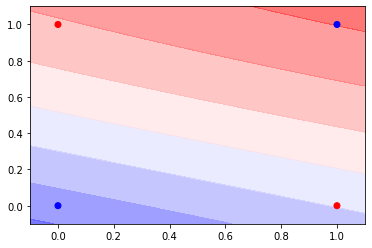

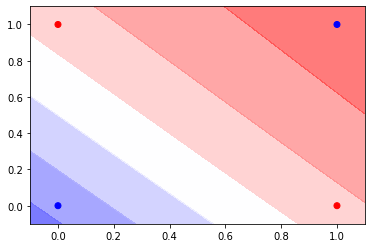

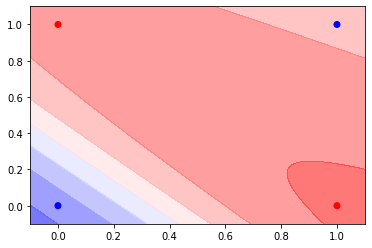

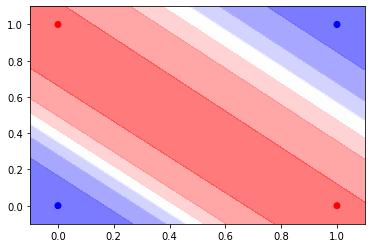

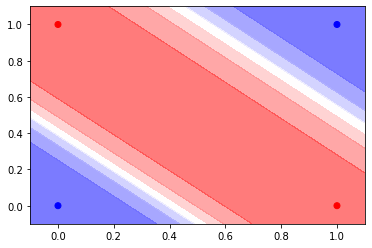

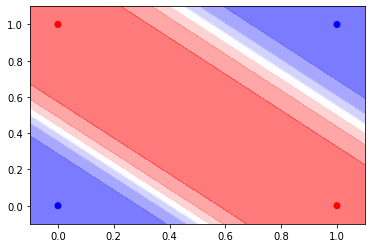

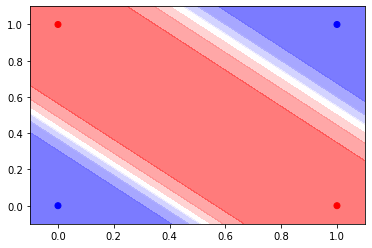

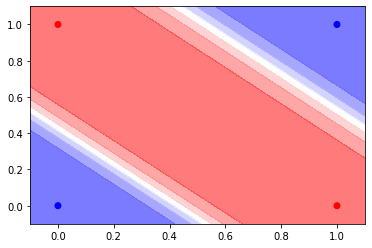

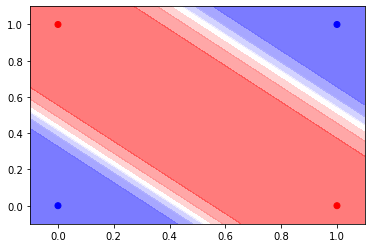

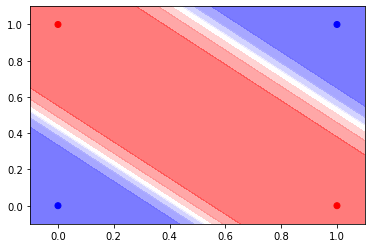

Entrada: [0 0], Salida: 0.00806495896938677
Entrada: [0 1], Salida: 0.9940995313197802
Entrada: [1 0], Salida: 0.9940812681653883
Entrada: [1 1], Salida: 0.006236351225780014


In [2]:
import numpy as np

# Datos de entrada (entradas x1 y x2 de la compuerta XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida (salidas y de la compuerta XOR)
y = np.array([0, 1, 1, 0])

# Funciones de activación sigmoidales
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Inicialización aleatoria de los pesos y sesgos
np.random.seed(42)
n_hidden = 2
w1 = np.random.randn(2, n_hidden)
b1 = np.random.randn(n_hidden)
w2 = np.random.randn(n_hidden)
b2 = np.random.randn()

# Función de entrenamiento de la red neuronal
def train_nn(X, y, w1, b1, w2, b2, learning_rate, epochs):
    for epoch in range(epochs):
        if epoch % 500 == 0:
            plot_perceptron_decision_boundary(X, y, w1, b1, w2, b2)
        for i in range(len(X)):
            # Forward propagation
            hidden_layer = sigmoid(np.dot(X[i], w1) + b1)
            y_pred = sigmoid(np.dot(hidden_layer, w2) + b2)

            # Backward propagation
            output_error = y_pred - y[i]
            hidden_error = np.dot(output_error, w2) * sigmoid_derivative(np.dot(X[i], w1) + b1)

            w2 -= learning_rate * output_error * hidden_layer
            #w2 -= learning_rate * output_error * sigmoid_derivative(np.dot(hidden_layer, w2) + b2) * hidden_layer
            b2 -= learning_rate * output_error
            w1 -= learning_rate * np.outer(X[i], hidden_error)
            b1 -= learning_rate * hidden_error

    return w1, b1, w2, b2

# Entrenamiento de la red neuronal
w1, b1, w2, b2 = train_nn(X, y, w1, b1, w2, b2, learning_rate=0.1, epochs=5000)

# Prueba de la red neuronal
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for x in test_data:
    hidden_layer = sigmoid(np.dot(x, w1) + b1)
    y_pred = sigmoid(np.dot(hidden_layer, w2) + b2)
    print(f"Entrada: {x}, Salida: {y_pred}")
